### Setup

In [1]:
!pip install -U scikit-learn
!pip install -U xgboost
!pip install -U catboost
import sklearn; sklearn.show_versions()

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)
     |████████████████████████████████| 109.8MB 45kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 64.8MB 62kB/s 

System:
    python: 3.6.9 (default, Nov  7 2019, 10:44:02)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 46.1.3
   sklearn: 0.22.2.post1
     numpy: 1.18.3
     scipy: 1.4.1
    Cython: 0.29.16
    pandas: 1.0.3
matplotlib: 3.2.1
    joblib: 0.14.1

Built with OpenMP: True


### Load Iris dataset

[Fixed](https://github.com/scikit-learn/scikit-learn/issues/10550) two wrong data points according to Fisher’s paper but not as in the [UCI Machine Learning Repository](
http://archive.ics.uci.edu/ml/datasets/iris).

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X, iris_y = load_iris(return_X_y=True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, random_state=0)

### Visualize

In [4]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


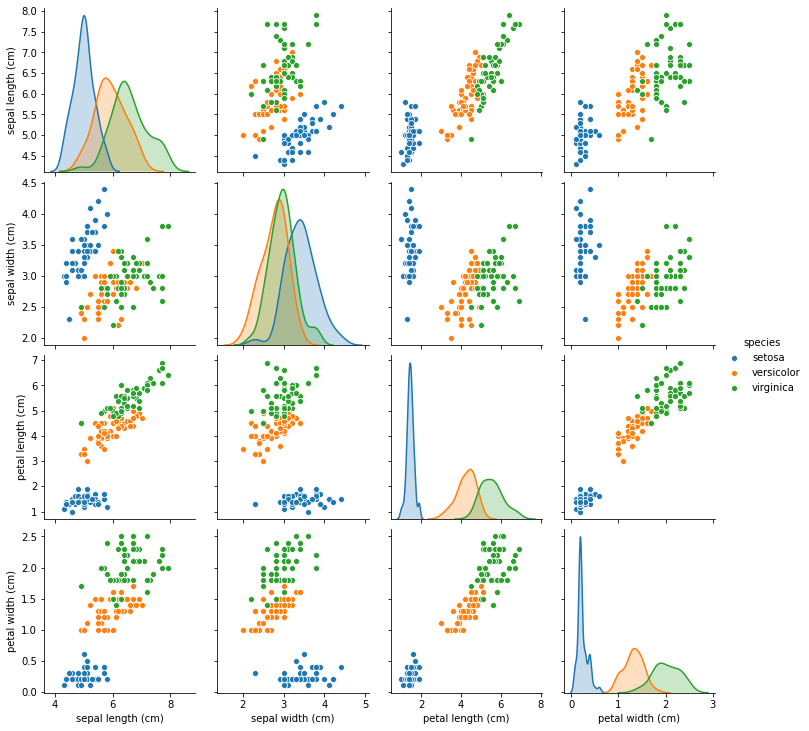

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns;
iris_species = pd.DataFrame([iris['target_names'][t] for t in iris['target']], columns=['species'])
iris_features = pd.DataFrame(iris['data'], columns= iris['feature_names'])
irisData = pd.concat([iris_features, iris_species], axis=1)
sns.pairplot(irisData, hue="species")

### SVM

In [6]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9736842105263158

In [7]:
from sklearn.model_selection import cross_validate
cross_validate(svm_clf, iris_X, iris_y, cv=4)

{'fit_time': array([0.00090241, 0.000669  , 0.00065875, 0.00058436]),
 'score_time': array([0.00044394, 0.0003531 , 0.0003314 , 0.00035834]),
 'test_score': array([0.97368421, 1.        , 0.94594595, 0.97297297])}

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9736842105263158

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9736842105263158

### XGBoost

In [10]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 2,
    'objective': 'multi:softmax',
    'num_class': 3}
num_round = 20
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-merror:0.10526	train-merror:0.03571
[1]	eval-merror:0.02632	train-merror:0.02679
[2]	eval-merror:0.02632	train-merror:0.02679
[3]	eval-merror:0.02632	train-merror:0.02679
[4]	eval-merror:0.02632	train-merror:0.02679
[5]	eval-merror:0.02632	train-merror:0.02679
[6]	eval-merror:0.02632	train-merror:0.02679
[7]	eval-merror:0.02632	train-merror:0.02679
[8]	eval-merror:0.02632	train-merror:0.02679
[9]	eval-merror:0.02632	train-merror:0.02679
[10]	eval-merror:0.02632	train-merror:0.01786
[11]	eval-merror:0.02632	train-merror:0.01786
[12]	eval-merror:0.02632	train-merror:0.00893
[13]	eval-merror:0.02632	train-merror:0.00000
[14]	eval-merror:0.05263	train-merror:0.00000
[15]	eval-merror:0.02632	train-merror:0.00000
[16]	eval-merror:0.02632	train-merror:0.00000
[17]	eval-merror:0.02632	train-merror:0.00000
[18]	eval-merror:0.02632	train-merror:0.00000
[19]	eval-merror:0.02632	train-merror:0.00000


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(bst.predict(dtest), y_test)

0.9736842105263158

### CatBoost

In [12]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(iterations=20,
                           depth=2)
model.fit(X_train, y_train, verbose=True)
model.get_evals_result()

Learning rate set to 0.5
0:	learn: 0.6393102	total: 46.5ms	remaining: 883ms
1:	learn: 0.4195358	total: 46.9ms	remaining: 422ms
2:	learn: 0.3214026	total: 47.5ms	remaining: 269ms
3:	learn: 0.2419475	total: 47.9ms	remaining: 192ms
4:	learn: 0.1993550	total: 48.2ms	remaining: 145ms
5:	learn: 0.1753420	total: 48.5ms	remaining: 113ms
6:	learn: 0.1666461	total: 48.9ms	remaining: 90.7ms
7:	learn: 0.1543696	total: 49.1ms	remaining: 73.7ms
8:	learn: 0.1396596	total: 49.5ms	remaining: 60.5ms
9:	learn: 0.1353750	total: 49.8ms	remaining: 49.8ms
10:	learn: 0.1238802	total: 50ms	remaining: 40.9ms
11:	learn: 0.1184779	total: 50.4ms	remaining: 33.6ms
12:	learn: 0.1134660	total: 50.6ms	remaining: 27.3ms
13:	learn: 0.1058766	total: 50.9ms	remaining: 21.8ms
14:	learn: 0.1012743	total: 51.3ms	remaining: 17.1ms
15:	learn: 0.0965227	total: 51.6ms	remaining: 12.9ms
16:	learn: 0.0942213	total: 52ms	remaining: 9.17ms
17:	learn: 0.0895687	total: 52.3ms	remaining: 5.81ms
18:	learn: 0.0837403	total: 52.6ms	remain

{'learn': {'MultiClass': [0.6393101776377884,
   0.419535836512286,
   0.32140256944426565,
   0.2419475338582864,
   0.1993549614744215,
   0.17534200398346828,
   0.16664610806769004,
   0.15436959257702215,
   0.13965963710092194,
   0.135374952079959,
   0.1238801616067391,
   0.11847787632355963,
   0.11346599684302486,
   0.10587664413835564,
   0.1012742785349934,
   0.0965226553913682,
   0.09422131612442645,
   0.08956874369384714,
   0.0837403497808077,
   0.07930318632466858]}}

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test), y_test)

0.9736842105263158